# Tutorial Problem One

**Exercise 1.** Assume that our animal observed the light intensity $u = 2$, the level of noise in its receptor is $\Sigma_u = 1$, and the mean and variance of its prior expectation of size are $v_p = 3$ and $\Sigma_p = 1$. Write a computer program that computes the posterior probabilities of sizes from 0.01 to 5, and plots them.

**Useful notation and equations:**

1. Size of a food particle: *v*

* Noisy estimate of light intensity: *u*

* Function relating average light intensity with size ($g$): $g(v) = v^2$ 

* $f(x; \mu, \Sigma)$ is the normal distribution with mean $\mu$ and standard deviation $\Sigma$.
  1. $f(x; \mu, \Sigma) = \frac{1}{\sqrt{2 \pi \Sigma}}$*$e^{-(\frac{(x-\mu)^2}{2\Sigma})}$

* Noisy sensor, when size of food is $v$, perceived light intensity is normally distributed with $\mu=g(v)$ and standard deviation $\Sigma_u$.
  1. $p(u|v) = f(u; g(v), \Sigma_u)$
  
* The animal expects the food size to be normally distributed, with mean $v_p$ and standard deviation $\Sigma_p$.
  1. $p(v) = f(v; v_p, \Sigma_p)$
    
* Bayes: $p(v|u) = \frac{p(u|v)p(v)}{p(u)}$


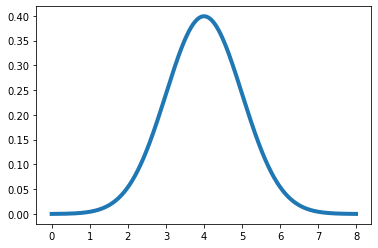

In [1]:
# Let's graph a normal distribution between 0 and 8 using discrete points calculated using Equation 4A
# Assume mean is 4 and standard deviation is 1

%matplotlib inline
import matplotlib.pyplot as plt
import math

mu = 4
sigma = 1
x_points = [i/100 for i in range(800)]
y_points = []
for x_point in x_points:
    multiplier = (2 * math.pi * sigma)**-0.5
    exp = -1 * (((x_point - mu)**2) / (2*sigma))
    y_point = multiplier * math.e ** exp
    y_points.append(y_point)
plt.plot(x_points, y_points, linewidth=4, label='foo')
plt.show()